In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [31]:
df=pd.read_csv("laptop_prices.csv")

In [33]:
df.head(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
5,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400.00,Standard,1366,...,No,AMD,3.0,A9-Series 9420,500,0,HDD,No,AMD,Radeon R5
6,Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,2139.97,Standard,2880,...,Yes,Intel,2.2,Core i7,256,0,Flash Storage,No,Intel,Iris Pro Graphics
7,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,1158.70,Standard,1440,...,No,Intel,1.8,Core i5,256,0,Flash Storage,No,Intel,HD Graphics 6000
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,1495.00,Full HD,1920,...,No,Intel,1.8,Core i7 8550U,512,0,SSD,No,Nvidia,GeForce MX150
9,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,1.60,770.00,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620


In [35]:
#  Data Cleaning
df = df.dropna()

Q1 = df["Price_euros"].quantile(0.25)



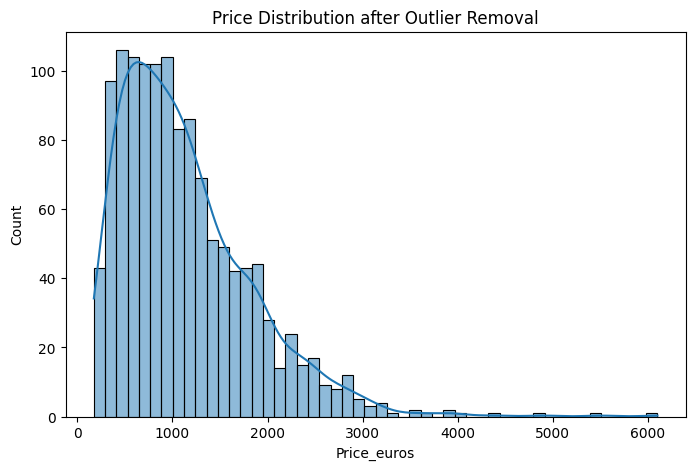

In [37]:
# Visualization - Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Price_euros"], bins=50, kde=True)
plt.title("Price Distribution after Outlier Removal")
plt.show()


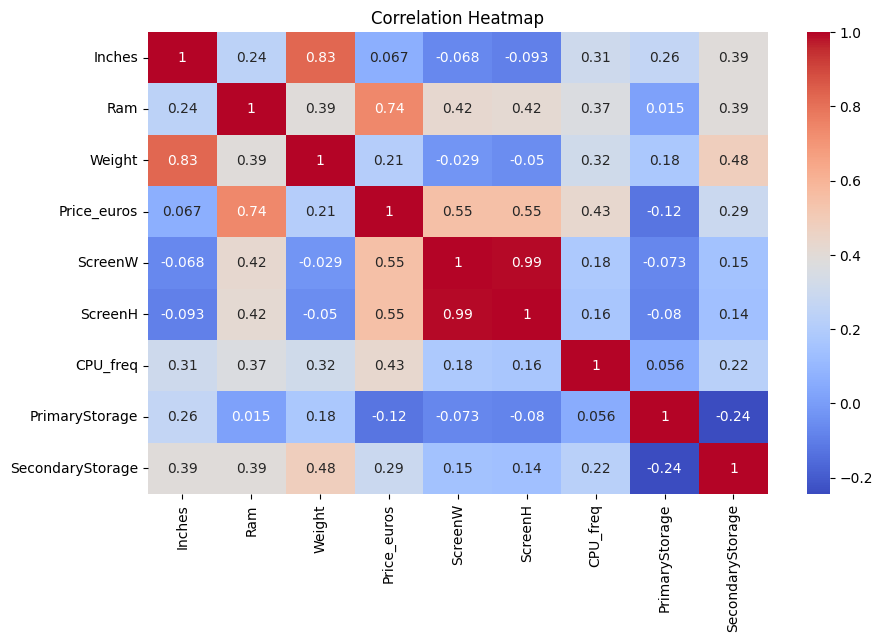

In [39]:
#  Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [41]:
# Convert categorical to numerical (One-Hot Encoding)
df = pd.get_dummies(df, drop_first=True)

X = df.drop("Price_euros", axis=1)   
y = df["Price_euros"]                #

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
# Model 1 - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)


Linear Regression MSE: 3935205.019752345
Linear Regression R2: -6.92845785087496


In [45]:
#  - Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)


Random Forest MSE: 64599.404218665346
Random Forest R2: 0.8698482922824806


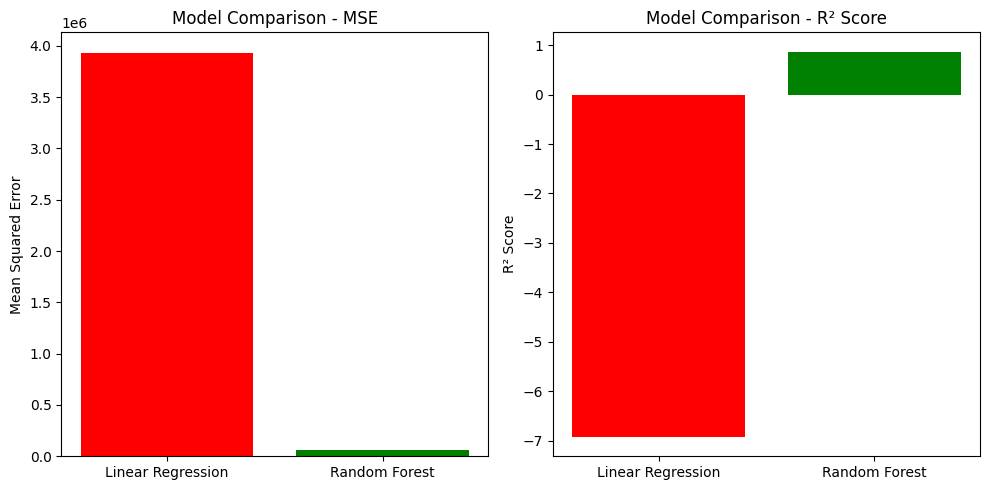

In [46]:
# Model Comparison (Bar Plot)
models = ["Linear Regression", "Random Forest"]
mse_scores = [mse_lr, mse_rf]
r2_scores = [r2_lr, r2_rf]

plt.figure(figsize=(10,5))

# MSE Plot
plt.subplot(1,2,1)
plt.bar(models, mse_scores, color=['red','green'])
plt.title("Model Comparison - MSE")
plt.ylabel("Mean Squared Error")

# R² Plot
plt.subplot(1,2,2)
plt.bar(models, r2_scores, color=['red','green'])
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()


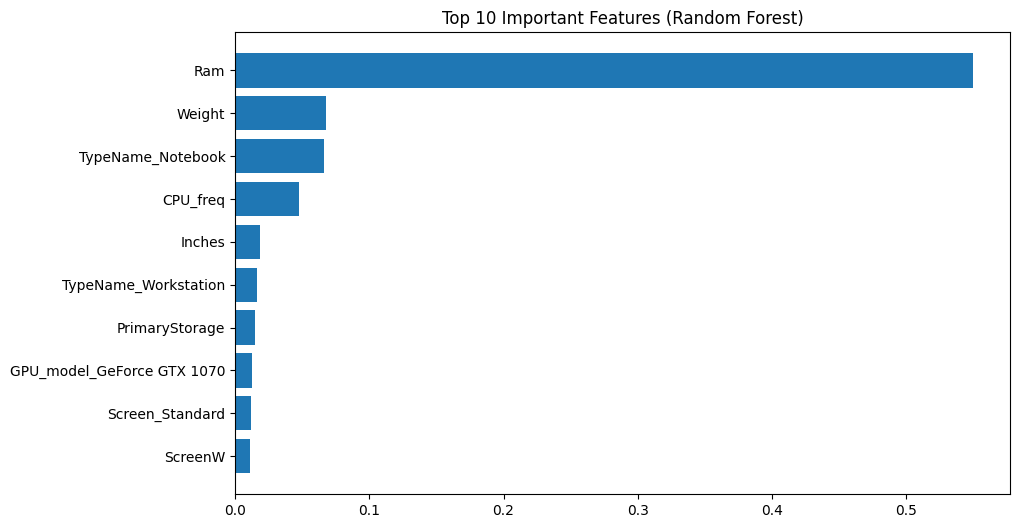

In [47]:
# 📌 Step 10: Feature Importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


In [12]:
all_features = X.columns  

new_data = pd.DataFrame(np.zeros((1, len(all_features))), columns=all_features)

# Step 3: Fill some values based on user input
new_data["Ram"] = 8
new_data["Weight"] = 2.0
new_data["Inches"] = 15.6

# Now find correct column names for categorical values
# Example: If your dataset had "Gpu_Nvidia" instead of "Gpu_Intel"
# then you must set that column
if "Gpu_Nvidia" in new_data.columns:
    new_data["Gpu_Nvidia"] = 1

if "Cpu_Intel Core i5" in new_data.columns:
    new_data["Cpu_Intel Core i5"] = 1

if "Memory_256GB SSD" in new_data.columns:
    new_data["Memory_256GB SSD"] = 1

# Step 4: Predict
predicted_price = rf.predict(new_data)
print("Predicted Laptop Price (Euros):", round(predicted_price[0], 2))


Predicted Laptop Price (Euros): 865.74


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = rf.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)
print("Model Accuracy:", round(r2 * 100, 2), "%")


MSE: 64599.404218665346
RMSE: 254.16412850491972
MAE: 170.57294606201367
R² Score: 0.8698482922824806
Model Accuracy: 86.98 %


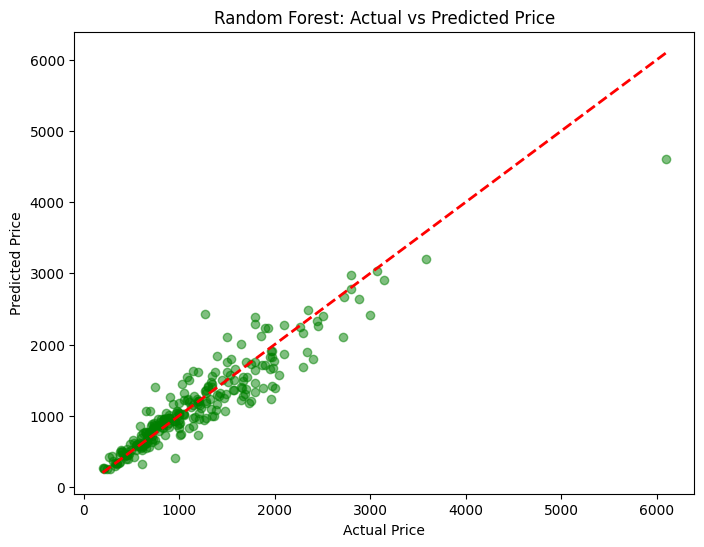

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Price")
plt.show()


In [52]:
import pickle

# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save feature columns
with open("features.pkl", "wb") as f:
    pickle.dump(X.columns, f)

print("✅ model.pkl and features.pkl created successfully!")


✅ model.pkl and features.pkl created successfully!


In [54]:
# Load model & features
model = pickle.load(open("model.pkl", "rb"))
features = pickle.load(open("features.pkl", "rb"))

print(features[:5])


Index(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH'], dtype='object')
